In [1]:
import json
from config import load_config
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import seaborn as sns

config_file = load_config(config_path="./outputs/results.json")


=== Loading .json file ===
Information form json file loaded successfully.


dataset_Pbmc10k
         NMI_cluster/label  ARI_cluster/label  ASW_label  \
pca               0.852068           0.845443   0.643882   
mofa              0.867113           0.863083   0.665219   
multivi           0.803270           0.789303   0.631022   
mowgli            0.042457          -0.000007   0.500000   

         isolated_label_silhouette  graph_conn  
pca                       0.652008    0.995100  
mofa                      0.666970    0.994316  
multivi                   0.675354    0.979669  
mowgli                    0.500000    0.151551  


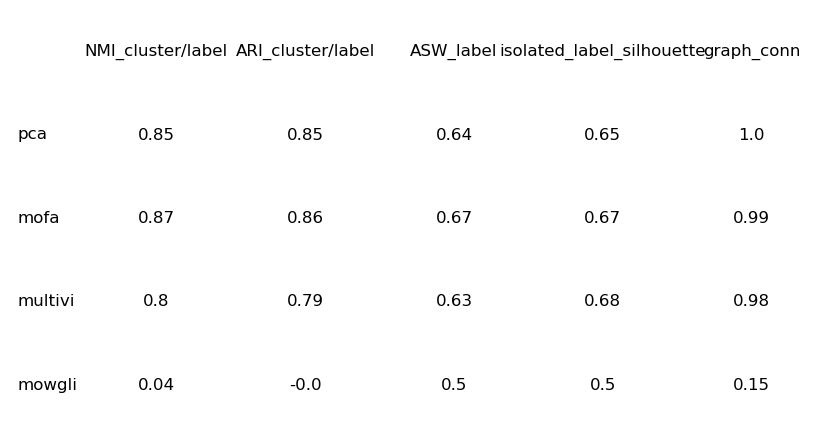

dataset_TEA
         NMI_cluster/label  ARI_cluster/label  ASW_label  \
pca               0.905487           0.771119   0.610334   
multivi           0.845428           0.715401   0.615638   
mofa              0.923100           0.914755   0.637445   

         isolated_label_silhouette  graph_conn  
pca                       0.616174         1.0  
multivi                   0.623712         1.0  
mofa                      0.650763         1.0  


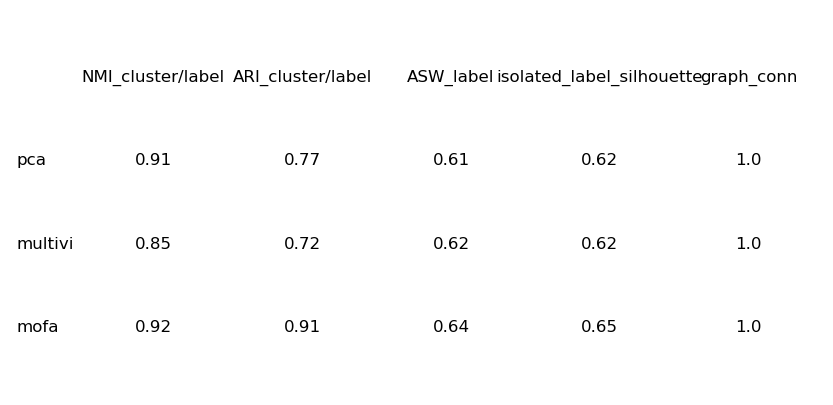

In [2]:
for dataset_names, data_dict in config_file.items():
    print(dataset_names)
    df = pd.DataFrame(data_dict)
    df = df.transpose()  # Transpose to get desired orientation

    # Sort by total score
    plot_df = df.sort_values(by="graph_conn", ascending=False).astype(np.float64)

    print(plot_df)
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot the DataFrame as a table with no colors or borders
    table = ax.table(cellText=plot_df.values.round(2), 
                  rowLabels=plot_df.index, 
                  colLabels=plot_df.columns,
                  loc='center',
                  cellLoc='center',  # Center text within cells
                  edges='open')  # Remove cell borders

    # Customize table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 5)  # Adjust cell size
    # Hide axes
    ax.axis('off')

    plt.show()

dataset_Pbmc10k
         NMI_cluster/label  ARI_cluster/label  ASW_label  \
pca               0.852068           0.845443   0.643882   
mofa              0.867113           0.863083   0.665219   
multivi           0.803270           0.789303   0.631022   
mowgli            0.042457          -0.000007   0.500000   

         isolated_label_silhouette  graph_conn  
pca                       0.652008    0.995100  
mofa                      0.666970    0.994316  
multivi                   0.675354    0.979669  
mowgli                    0.500000    0.151551  


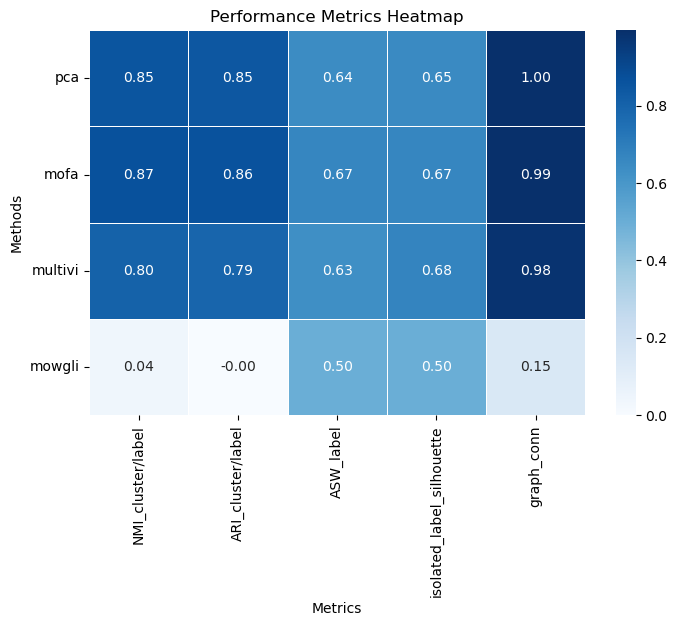

dataset_TEA
         NMI_cluster/label  ARI_cluster/label  ASW_label  \
pca               0.905487           0.771119   0.610334   
multivi           0.845428           0.715401   0.615638   
mofa              0.923100           0.914755   0.637445   

         isolated_label_silhouette  graph_conn  
pca                       0.616174         1.0  
multivi                   0.623712         1.0  
mofa                      0.650763         1.0  


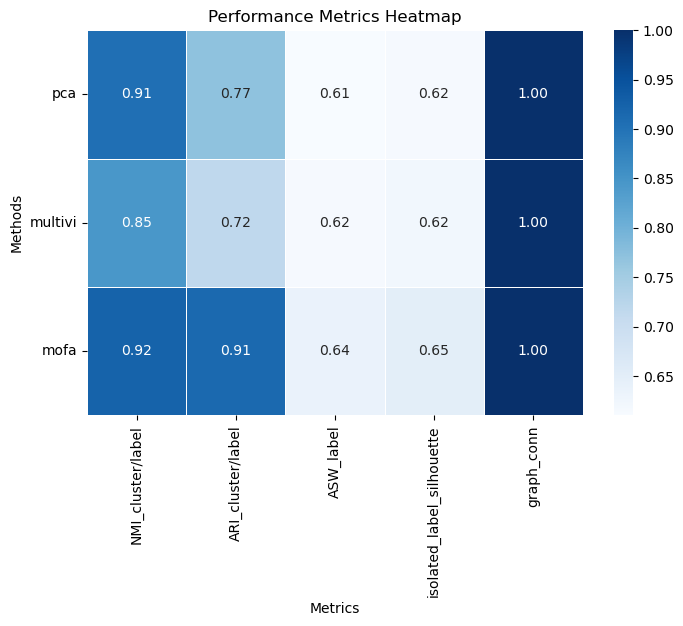

In [3]:
for dataset_names, data_dict in config_file.items():
    print(dataset_names)
    df = pd.DataFrame(data_dict)
    df = df.transpose()  # Transpose to get desired orientation

    # Sort by total score
    plot_df = df.sort_values(by="graph_conn", ascending=False).astype(np.float64)

    print(plot_df)
    plt.figure(figsize=(8, 5))
    sns.heatmap(plot_df, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, yticklabels=True) 
    # Rotate y-axis labels to be horizontal
    plt.yticks(rotation=0) 
    # Add plot title and labels
    plt.title('Performance Metrics Heatmap')
    plt.xlabel('Metrics')
    plt.ylabel('Methods')
    plt.show()

dataset_Pbmc10k
      index                   variable     value
0       pca          NMI_cluster/label  0.852068
1      mofa          NMI_cluster/label  0.867113
2   multivi          NMI_cluster/label  0.803270
3    mowgli          NMI_cluster/label  0.042457
4       pca          ARI_cluster/label  0.845443
5      mofa          ARI_cluster/label  0.863083
6   multivi          ARI_cluster/label  0.789303
7    mowgli          ARI_cluster/label -0.000007
8       pca                  ASW_label  0.643882
9      mofa                  ASW_label  0.665219
10  multivi                  ASW_label  0.631022
11   mowgli                  ASW_label  0.500000
12      pca  isolated_label_silhouette  0.652008
13     mofa  isolated_label_silhouette  0.666970
14  multivi  isolated_label_silhouette  0.675354
15   mowgli  isolated_label_silhouette  0.500000
16      pca                 graph_conn  0.995100
17     mofa                 graph_conn  0.994316
18  multivi                 graph_conn  0.979669
19  

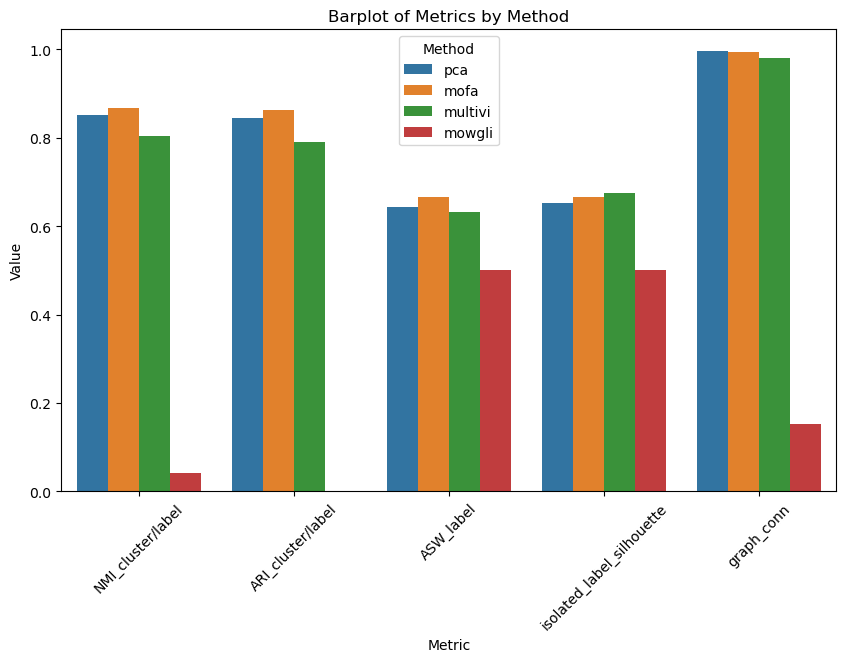

dataset_TEA
      index                   variable     value
0       pca          NMI_cluster/label  0.905487
1   multivi          NMI_cluster/label  0.845428
2      mofa          NMI_cluster/label  0.923100
3       pca          ARI_cluster/label  0.771119
4   multivi          ARI_cluster/label  0.715401
5      mofa          ARI_cluster/label  0.914755
6       pca                  ASW_label  0.610334
7   multivi                  ASW_label  0.615638
8      mofa                  ASW_label  0.637445
9       pca  isolated_label_silhouette  0.616174
10  multivi  isolated_label_silhouette  0.623712
11     mofa  isolated_label_silhouette  0.650763
12      pca                 graph_conn  1.000000
13  multivi                 graph_conn  1.000000
14     mofa                 graph_conn  1.000000


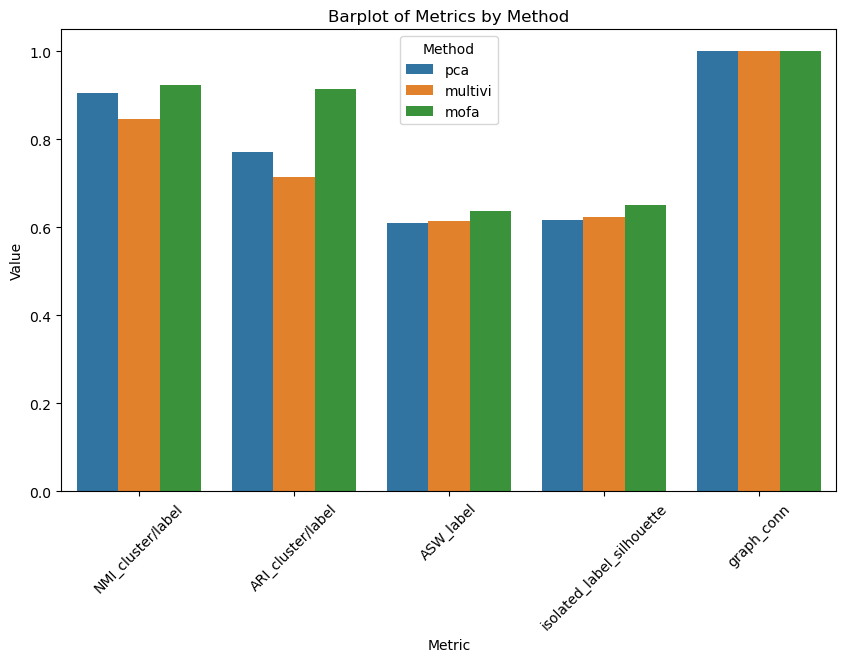

In [ ]:
for dataset_names, data_dict in config_file.items():
    print(dataset_names)
    df = pd.DataFrame(data_dict)
    df = df.transpose()  # Transpose to get desired orientation

    # Sort by total score
    plot_df = df.sort_values(by="graph_conn", ascending=False).astype(np.float64)
    plot_df = plot_df.reset_index().melt(id_vars='index')
    print(plot_df)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='variable', y='value', hue='index', data=plot_df)
    plt.title('Barplot of Metrics by Method')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Method')
    plt.show()